# Code to generate the Temporal Node Activity Plot on the Highschool Dataset

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [23]:
# Look at first day
from datasets import load_dataset

events, nodes = load_dataset("highschool").values()

events = events.set_index("date")
dates = events.index.unique()
dates = dates.sort_values()
events = events.loc[dates[0]]

from stats import collect_node_statistics, collect_edge_statistics

collect_node_statistics(events)


# Convert 't' to datetime

,date,t,src,dst,datetime,index,src_arrival_rank,dst_arrival_rank,src_degree,dst_degree
0,2012-11-19,1353303380,153,164,2012-11-19 07:36:20,0,0,1,1.0,1.0
1,2012-11-19,1353303400,153,158,2012-11-19 07:36:40,1,0,2,2.0,1.0
2,2012-11-19,1353303640,153,164,2012-11-19 07:40:40,2,0,1,3.0,2.0
3,2012-11-19,1353303760,154,167,2012-11-19 07:42:40,3,4,3,1.0,1.0
4,2012-11-19,1353303840,149,155,2012-11-19 07:44:00,4,6,5,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
9952,2012-11-19,1353341420,105,110,2012-11-19 18:10:20,9952,50,11,68.0,49.0
9953,2012-11-19,1353341440,77,105,2012-11-19 18:10:40,9953,12,50,64.0,69.0
9954,2012-11-19,1353341500,137,144,2012-11-19 18:11:40,9954,145,66,108.0,63.0
9955,2012-11-19,1353341640,32,137,2012-11-19 18:14:00,9955,121,145,88.0,109.0


In [24]:
import matplotlib.pyplot as plt


events["src_class"] = events.src.map(nodes.set_index("id")["class"])
events["dst_class"] = events.dst.map(nodes.set_index("id")["class"])

# Plot src tnt
events["same_class"] = events.src_class == events.dst_class
events.head()
events["delta_t"] = events["t"] - events["t"].min()

Text(0, 0.5, 'Node Arrival Rank')

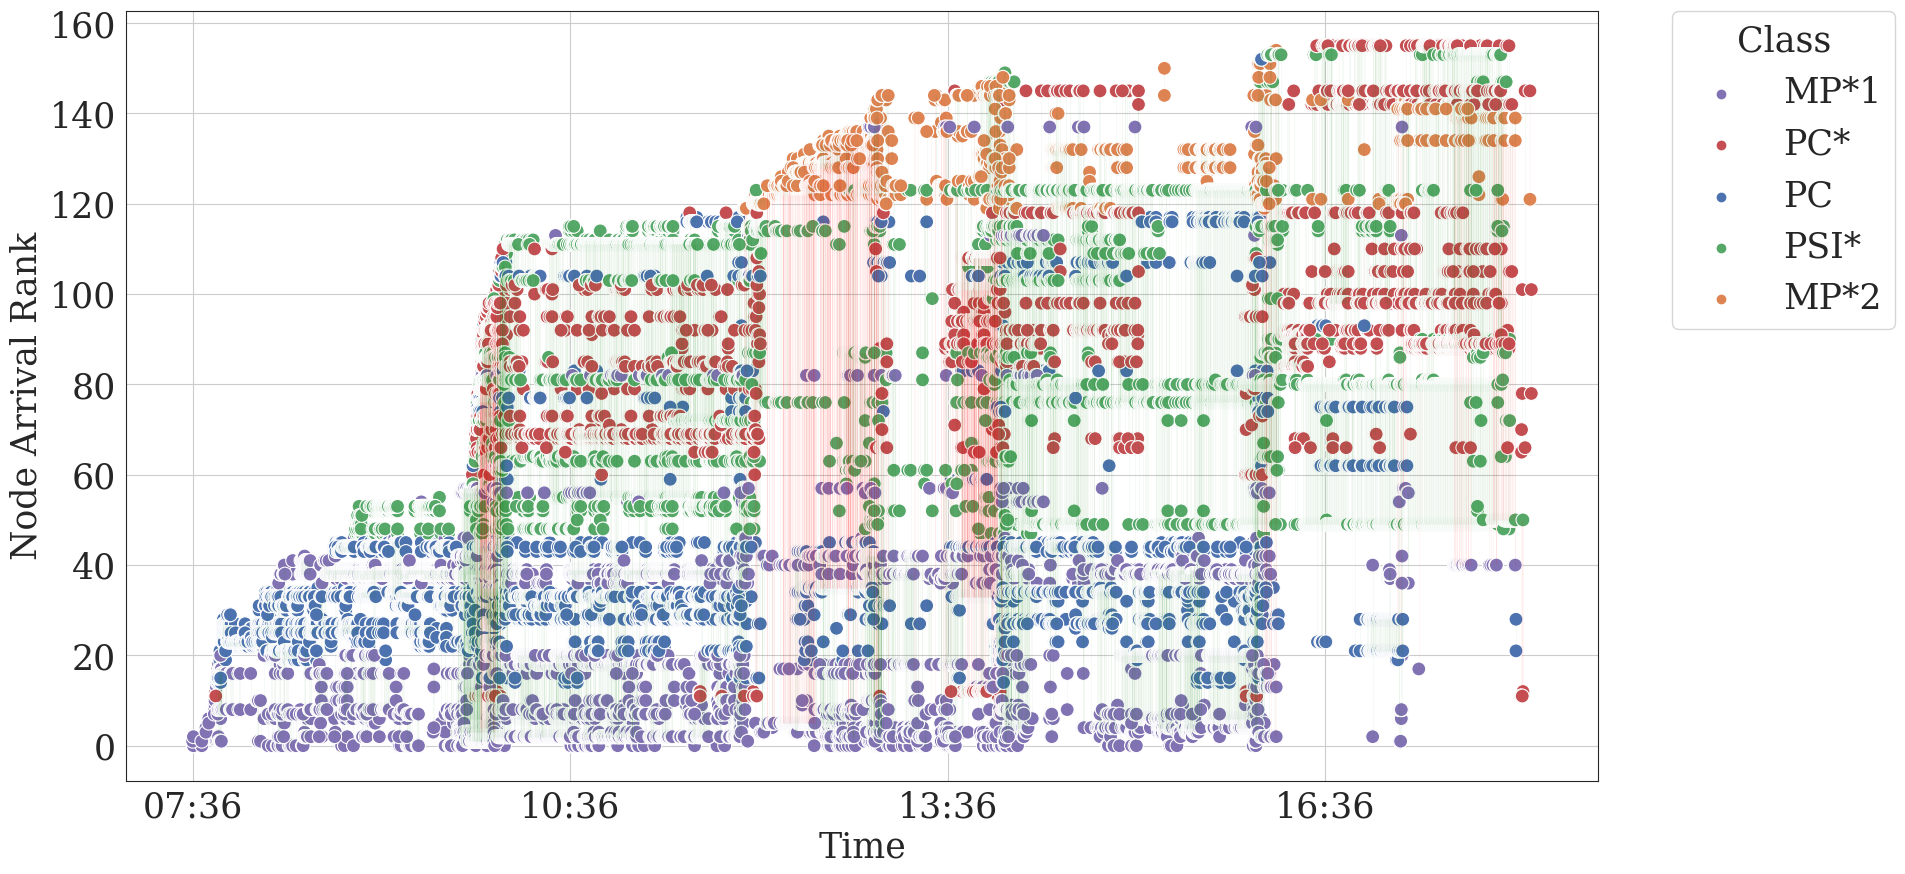

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import pylab as pl
from matplotlib import collections as mc

# Plot (src_arrival_rank,t) and (dst_arrival_rank,t) on 1 scatter plot, sharing the legend
# Categorical color palette for the classes
import shared_utils

shared_utils.set_theme()

fig, ax = plt.subplots(figsize=(19, 10))
classes = nodes["class"].unique()
# (deep, muted, bright, pastel, dark, colorblind)
palette = sns.color_palette("deep", len(classes))

palette = {c: palette[i] for i, c in enumerate(classes)}

sns.scatterplot(
    data=events,
    x="delta_t",
    y="src_arrival_rank",
    hue="src_class",
    palette=palette,
    legend=False,
    ax=ax,
    s=100,
    # edgecolor="black",
)
sns.scatterplot(
    data=events,
    x="delta_t",
    y="dst_arrival_rank",
    hue="dst_class",
    palette=palette,
    legend=True,
    ax=ax,
    s=100,
    # edgecolor="black",
)

ax.legend(
    bbox_to_anchor=(1.05, 1),
    loc=2,
    borderaxespad=0.0,
    title="Class",
)

# Label the x axis with the time (hour:minute)
plot_datetime = pd.date_range(
    events["datetime"].min(),
    events["datetime"].max(),
    freq="3H",
)
plot_delta_ts = (plot_datetime - events["datetime"].min()).total_seconds()
_ = ax.set_xticks(plot_delta_ts)
ax.set_xticklabels(plot_datetime.strftime("%H:%M"))


line_start = events[["delta_t", "src_arrival_rank"]].values
line_end = events[["delta_t", "dst_arrival_rank"]].values

lines = np.stack((line_start, line_end), axis=1)
lc = mc.LineCollection(
    lines,
    linewidths=0.5,
    alpha=0.05,
    colors=np.where(events["same_class"], "green", "red"),
)
ax.add_collection(lc)

ax.set_xlabel("Time")
ax.set_ylabel("Node Arrival Rank")